# 1. Vježba 2 -  Balansiranje AVL stabala 

Definicija:

Idealno balansirano stablo je ono gdje su podstabla svakog čvora iste visine *h*. 

Neidealno balansirano stablo je ono gdje se visina *h* podstabala svakog čvora razlikuju za ne više od 1.

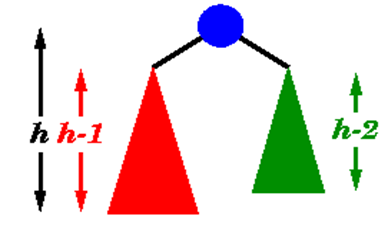



Da bi stablo balansirali čvorovi moraju biti prepozicionirani bez gubitka naravi stabla.

Dva pristupa:

1. Lijeva rotacija 

2. Desna rotacija

Postupak rotacije:

 - ako je čvor *x* bio lijevo dijete čvora *y* prije rotacije (jer je vrijednost *x* manja od vrijednosti *y*) tada *y* postaje desno dijete od čvora *x*, i obratno,
 - osim toga se treba izvršiti prespajanje podstabla s ključevima koji leže između ključeva dviju pozicija koje se rotiraju, npr. podstablo T2 predstavlja ključeve koji su veći od pozicije x ali manji od pozicije y. 
 
U prvoj konfiguraciji T2 je desno podstablo pozicije x, a u drugoj konfiguraciji je lijevo podstablo od pozicije y.

 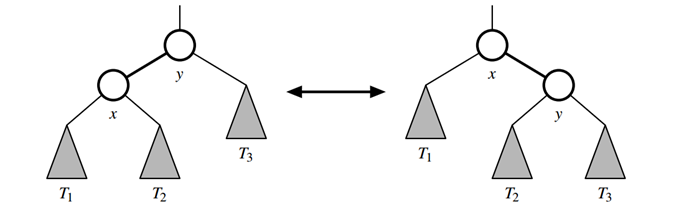

 - prespajanje čvorova se radi za O(1) vremena,
 - rotacija se koristi kako bi izbjegli veliki disbalans stabla,
 - npr. kod rotacije desno reducira se dubina svakog čvora u podstablu T1 za 1,  dok se istodobno povećava dubina svakog čvora u podstablu T3 za 1,
 - dubine čvorova u podstablu T2 se ne mijenjaju. 
 
 - pored rotacije koristi se još tehnika restrukturiranja tri čvora, označimo ih sa x, njegovim roditeljem y i njegovim djedom z
 - označimo čvorove sa *a*, *b* i *c* gdje *a* prethodi *b*, a *b* prethodi *c*
 - u tom slučaju postoje četiri moguće situacije mapiranja x, y i z na a, b i c kako je to prikazano na sljedećoj slici

Jednostruke rotacije:

 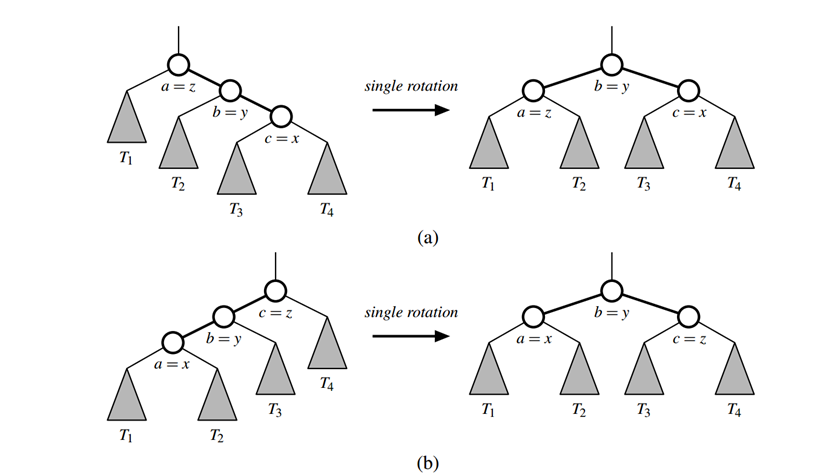


Dvostruke rotacije:

 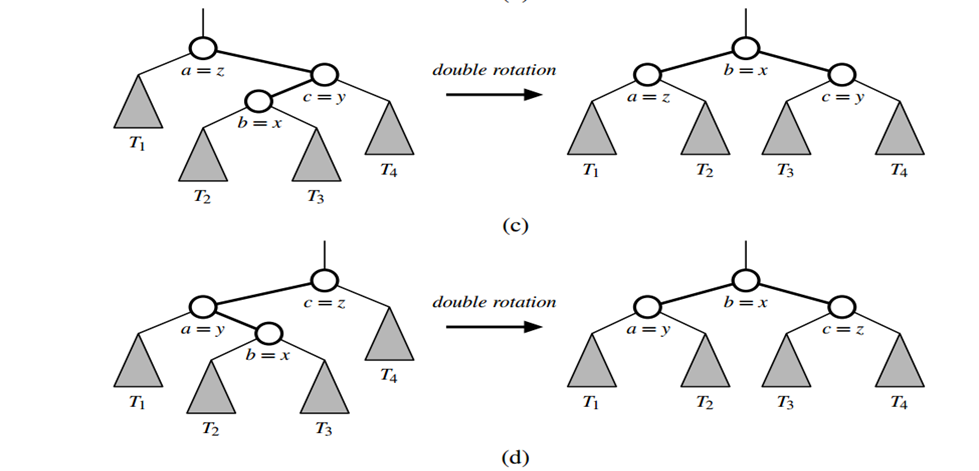


##  AVL BST  STABLO - PROGRAMSKI KÔD

Implementacija AVL BST u kojem su implementirane funkcije za dodavanje, brisanje te za lijevu i desnu rotaciju. Dvostruke rotacije ostvaruju se pomoću lijeve i desne rotacije. 

**Balansiranje u ovom primjeru nije implementirano već se rotacije provode "ručno" tj. pronalazi se čvor krenuvši od korijena stabla koji treba zarotirati.**


### NAPOMENA 

**Visina stabla se broji od 1 (listovi) prema korijenu (root).**

Primjeri otežanosti (4 slučaja).

Poznavanje slučaja otežanosti potrebno je kad se kod dodavanja čvora treba provesti balansiranje.

Dva koraka do balansiranosti stabla:
1. Utvrditi koji od operativnih čvorova je u nebalansiranom stanju. To dobijemo određivanjem lijevih i desnih visina čvora djeteta za vrijeme operacija koje mijenjaju strukturu stabla – DODAVANJE i BRISANJE čvora.
2. Drugi korak je balansiranje primjenom rotacija

AVL stabla koriste dvije temeljne rotacije:  LIJEVU i DESNU rotaciju i dvije kompozitne rotacije koje koriste ove osnovne, DESNA-LIJEVA i LIJEVA-DESNA rotacija

##### Desna rotacija - otežanost je lijevo-lijevo


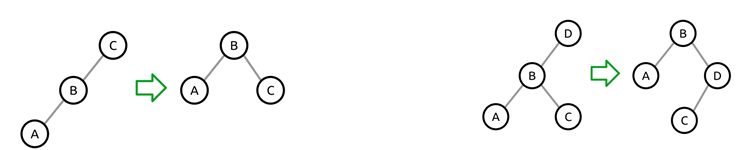

1. Desna rotacija premješta lijevo dijete korijena na poziciju korijena (slika lijevo).
2. Desna rotacija premješta desno dijete lijevog  djeteta na poziciju lijevog djeteta starog korijena (slika desno).


Algoritam desne rotacije ima tri koraka (iz perspektive čvora D na desnoj slici).
1. Zamijenimo korijen s njegovim neposrednim lijevim djetetom (ono postaje korijen)
2. Pomičemo desno dijete novog korijena na poziciju lijevog djeteta starog korijena (B < C  se mijenja u D > C)
3. Pridružimo da stari korijen D bude desno dijete novog korijena B
 

##### Lijeva rotacija - otežanost je desno-desno

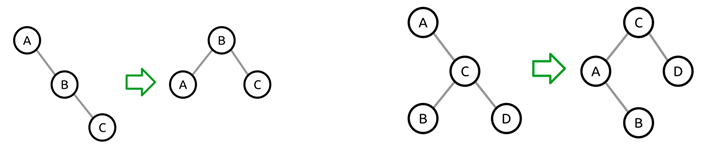

1. Lijeva rotacija premješta desno dijete korijena na poziciju korijena (slika lijevo).
2. Lijeva rotacija premješta lijevo dijete desnog djeteta na poziciju desnog djeteta starog korijena (slika desno).

Algoritam lijeve rotacije ima tri koraka (iz perspektive čvora A)
1. Zamijenimo korijen s njegovim neposrednim desnim djetetom (ono postaje korijen) – to premješta desni čvor C korijena A na njegovu poziciju
2. Pomičemo lijevo dijete novog korijena na poziciju desnog djeteta starog korijena (C > B  se mijenja u B > A).
3. Pridružimo da stari korijen A bude lijevo dijete novog korijena C.


##### Lijevo-desna rotacija - otežanost je lijevo-desno

Situacija je ovdje obrnuta: Krećemo s nebalansiranim stablom čiji korijen ima lijevo dijete koje ima desno dijete ali nema lijevo. U ovom slučaju prvo primijenimo LIJEVU rotaciju na lijevom djetetu korijena, a zatim DESNU rotaciju na korijenu (slika). 

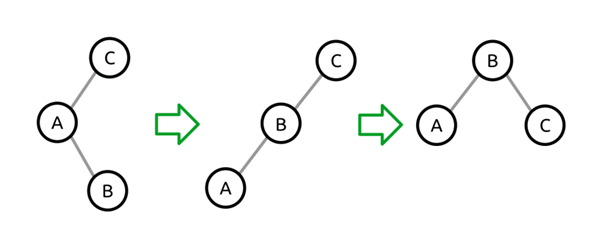


##### Desno-lijeva rotacija  - otežanost desno-lijevo

Desno-lijeva rotacija je kompozitna rotacija koja primjenjuje DESNU rotaciju na desno dijete korijena i zatim lijevu rotaciju na razini čvora korijena. 

 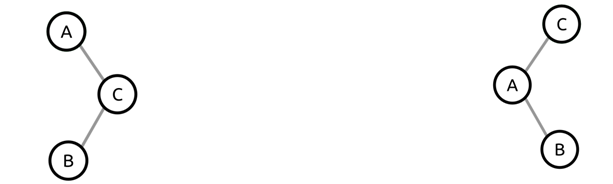   


Vidimo da desni čvor korijena ima lijevo dijete, ali nema desno dijete (lijeva slika). Stablo je desno otežano (A) pa nas to navodi na zaključak da ga rotiramo lijevo
1. Premjestimo C na poziciju korijena
2. Pridružimo lijevo dijete B novog korijena C kao desno dijete starog korijena A
3. Pridružimo A kao lijevo dijete od C 

Rezultat je opet nebalansirano stablo na desnoj slici.



Da bi izbjegli prethodni slučaj prvo napravimo desnu rotaciju desnog djeteta korijena. Privremeno ignoriramo čvor A. 

Desna rotacija premješta B na poziciju korijena, a čvor C postaje njegovo desno dijete 

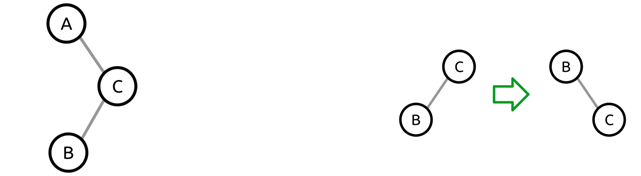



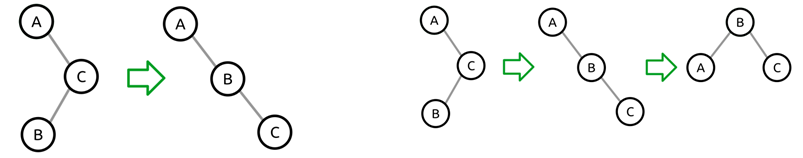

Rezultat desne rotacije za cijelo stablo je (lijeva slika).
Sada imamo situaciju kad možemo primijeniti lijevu rotaciju i dobiti balansirano stablo (desna slika)

### Programski kôd za implementaciju binarnog stabla pretraživanja

In [7]:
class BSTree:
    # Klasa čvor - definirana je s vrijednošću čvora (val) i referencama na lijevo i desno dijete (left i right)
    class Node:
        def __init__(self, val, left=None, right=None):
            self.val = val
            self.left = left
            self.right = right
            
        def rotate_right(self):
            n = self.left
            self.val, n.val = n.val, self.val
            self.left, n.left, self.right, n.right = n.left, n.right, n, self.right
        
        def rotate_left(self):
            n = self.right
            self.val, n.val = n.val, self.val
            self.right, n.right, self.left, n.left = n.right, n.left, n, self.left
       
       
    '''
    Definicija binarnog stabla pretraživanja 
    Definira se referenca na korijen stabla (root) i veličina stabla (size)   
    '''        
    def __init__(self):
        self.size = 0
        self.root = None
    
    # metoda koja dodaje novi čvor u stablo na mjesto prema pravilima BST ali ne balansira stablo
    def add(self, val):
        assert(val not in self)
        def add_rec(node):
            if not node:
                return BSTree.Node(val)
            elif val < node.val:
                node.left = add_rec(node.left)
                return node
            else:
                node.right = add_rec(node.right)
                return node
        self.root = add_rec(self.root)
        self.size += 1
    
    # metoda za traženje da li stablo sadrži podatak 
    def __contains__(self, val):
        def contains_rec(node):
            if not node:
                return False
            elif val < node.val:
                return contains_rec(node.left)
            elif val > node.val:
                return contains_rec(node.right)
            else:
                return True
        return contains_rec(self.root)
    
    def __len__(self):
        return self.size
    
    # metoda koja briše čvor prema danom podatku
    def delitem(self, val):
        assert(val in self)
        def delitem_rec(node):
            if val < node.val:
                node.left = delitem_rec(node.left)
                return node
            elif val > node.val:
                node.right = delitem_rec(node.right)
                return node
            else:
                if not node.left and not node.right:
                    return None
                elif node.left and not node.right:
                    return node.left
                elif node.right and not node.left:
                    return node.right
                else:
                    # remove the largest value from the left subtree as a replacement
                    # for the root value of this tree
                    t = node.left
                    if not t.right:
                        node.val = t.val
                        node.left = t.left
                    else:
                        n = t
                        while n.right.right:
                            n = n.right
                        t = n.right
                        n.right = t.left
                        node.val = t.val
                    return node
                        
        self.root = delitem_rec(self.root)
        self.size -= 1
    
        
    def pprint(self, width=64):
        """Attempts to pretty-print this tree's contents."""
        height = self.height()
        nodes  = [(self.root, 0)]
        prev_level = 0
        repr_str = ''
        while nodes:
            n,level = nodes.pop(0)
            if prev_level != level:
                prev_level = level
                repr_str += '\n'
            if not n:
                if level < height:
                    nodes.extend([(None, level+1), (None, level+1)])
                repr_str += '{val:^{width}}'.format(val='-', width=width//2**level)
            elif n:
                if n.left or level < height:
                    nodes.append((n.left, level+1))
                if n.right or level < height:
                    nodes.append((n.right, level+1))
                repr_str += '{val:^{width}}'.format(val=n.val, width=width//2**level)
        print(repr_str)
    
    def height(self):
        """Returns the height of the longest branch of the tree."""
        def height_rec(t):
            if not t:
                return -1
            else:
                return max(1+height_rec(t.left), 1+height_rec(t.right))
        return height_rec(self.root)

#### Primjeri stvaranja BST stabla i rotacije koje se odrađuju ručno

Dodavanje vrijednosti iz liste u stablo metodom *add(x)* i ispis stabla po razinama.

Uočava se da su vrijednosti ispravno dodane (po pravilo binarnog stabla pretraživanja) ali ovo stablo je tzv. degenerirano binarno stablo čija složenost pretraživanja je reda *O*(*n*) gdje je *n* broj čvorova u stablu, što nam je u svakom slučaju nepovoljno. Razlog tome što ovdje nije napravljeno balansiranje, koje se mora odmah provesti kod dodavanja čvora.

In [8]:
# Primjer kreiranja nebalansiranog BST stabla iz liste, iscrtavanje stabla i ispis visine
t = BSTree()
# dodavanje u stablo iz liste
for x in [1, 5, 10, 4]:
    t.add(x)

# crtanje stabla
t.pprint()
# ispis visine stabla
print("Visina stabla je: ", t.height())

                               1                                
               -                               5                
       -               -               4               10       
Visina stabla je:  2


# Zadatak 1



Cilj zadatka je za zadane podatke u listama izgradi binarno stablo pretraživanja i uočiti debalanse te ih ručnim rotiranjem izbalansirati. U zadatku 1 su jednostavniji primjeri.

Npr. kad treba učiniti balansiranje ulijevo tada se za stvoreni objekt stabla *t = BSTree()* pozivom metode *rotate_left()* izvodi rotacija ulijevo. Npr. na korijenu stabla: *t.root.rotate_left()*

Da bi se to napravilo treba:
 1. Napuniti stablo s podacima iz liste i nacrtati ga.
 2. Uočiti na kojem čvoru je debalans.
 3. Izvršiti one rotacije koje su potrebne i nacrtati stablo. 
 4. U Markdown ćeliji napisati kratki komentar što je trebalo uraditi i zašto.

Liste koje je potrebno realizirati i balansirati prema zahtjevima zadatka:

1. [30, 40, 10, 45, 50]
2. [17, 14, 12, 16] 
3. [80, 90, 50, 100, 95, 60]
4. [60, 32, 90, 20, 95, 28]

## Rješenja Zadatka 1

Sva četiri balansiranja za liste 1 do 4 prikazati po sljedećem uzorku: 

**Komentar za balansiranje stabla prema Listi 1**



### Brisanje čvora i balansiranje

Kada se obriše neki čvor može se poremetiti balans. 

#### Pravila brisanja

Kada brišemo element također moramo voditi računa da se zadrže svojstva binarnog stabla pretraživanja.
1. Ako je čvor koji brišemo list samo ga maknemo i provjerimo da li je došlo do debalansa i ako treba rotiramo.
2. Ako čvor koji brišemo ima samo lijevo dijete (ili samo desno dijete) onda nakon brisanja tog čvora na njegovo mjesto dolazi lijevo dijete (ili desno dijete) 
3. U suprotnom, ako čvor kojeg brišemo ima oba djeteta tada tražimo čvor koji je najveći u njegovom lijevom podstablu kojeg brišemo (inorder obilazak). ??Ako taj najveći nema desno dijete onda ga stavimo na mjesto čvora koji se briše, a na njegovo mjesto dolazi njegovo lijevo dijete.??

### Brisanje - nema rotacije

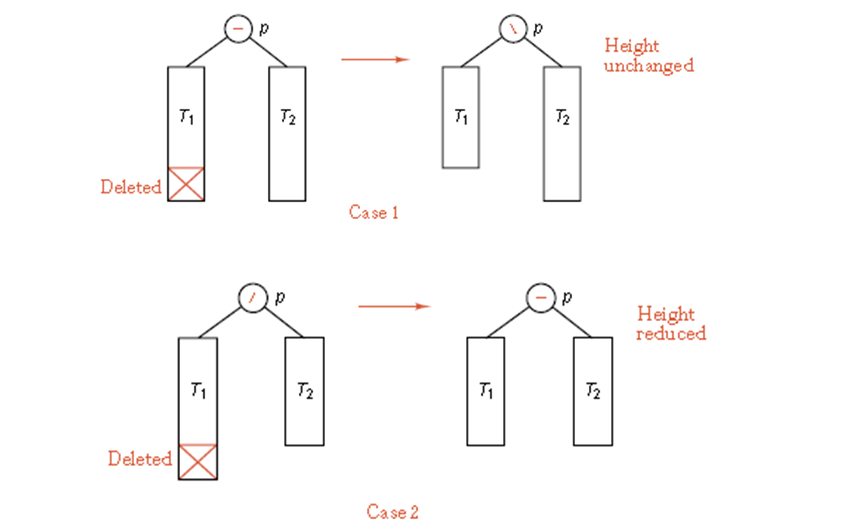



### Brisanje - s jednom rotacijom 

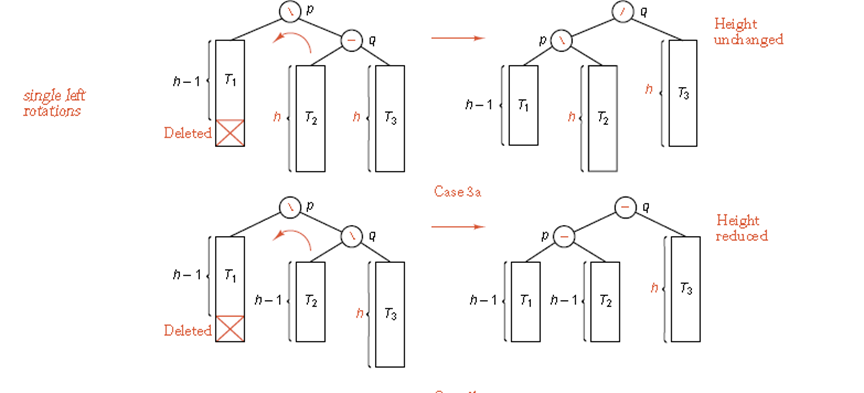

### Brisanje - s dvije rotacije

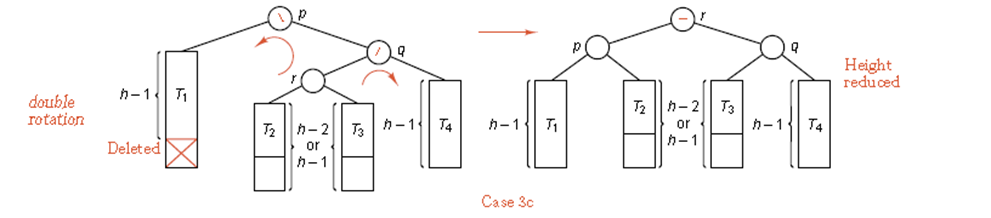

# Zadatak 2

Kod realizacije svakog brisanja komentirati koji slučaj brisanja imamo (list, čvor s jednim djetetom, čvor s dva djeteta i sl.)

1. Formirati stablo za zadanu listu  L = [25, 19, 29, 12, 17, 35, 27]
2. Obrisati čvor 17 i komentirati da li treba balansiranje te ga realizirati
3. Obrisati čvor 19 i komentirati da li treba balansiranje te ga realizirati
4. Obrisati čvor 12 i komentirati da li treba balansiranje te ga realizirati
5. Obrisati čvor 29 i komentirati da li treba balansiranje te ga realizirati

## Rješenja Zadatka 2



# Zadatak 3

U ovom zadatku se također rade odgovarajuće rotacije radi balansiranja kojih može biti više (i u lijevom i u desnom podstablu u odnosu na početni korijen).

Zadano je stablo s listom L = [10, 12, 3, 8, 22, 7, 23, 27, 26]  koje treba u potpunosti izbalanisrati.
1. Napuniti stablo 
2. Nacrtati stablo
3. Uočiti sve debalanse koji postoje u tom stablu 
4. U potpunosti "ručno" izbalansirati to stablo
5. Operacije (rotacije)  koje se provode komentirati korak po korak i svaki put prikazati rezultat.


## Rješenja Zadatka 3

